## Суть проекта 
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

Импортируем необходимые библиотеки и прочитаем исходный файл с данными.

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [155]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Как видим из просмотра данных, имеется 30 столбцов c 395 строками. Из них 13 числовых столбцов.
Также заметим, что в столбцах возможны отсутствующие значения. Напишем функцию, заменяющую nan на None

In [156]:
def nan_to_none(x):
    if (pd.isnull(x)) or (x == 'nan'):
        return None
    else:
        return x

Теперь рассмотрим каждый столбец отдельно.

Для удобства, напишем функцию, отражающую основную инфомрацию по столбцу.

In [157]:
def full_info(column_name, short_name):
    display('Пример данных:', column_name)
    display('Описание:', column_name.describe())
    display('Сколько значений содержит столбец:',
            pd.DataFrame(column_name.value_counts()))
    display("Кол-во уникальных значений:", column_name.nunique())
    display("Уникальные значения:", column_name.unique())
    display("Инфо:", stud_math.loc[:, [short_name]].info())
    display('Гистограмма:', column_name.hist())

## school — аббревиатура школы, в которой учится ученик

Рассмотрим какие и сколько уникальных значений данного признака в датасете присутствуют.

'Пример данных:'

0      GP
1      GP
2      GP
3      GP
4      GP
       ..
390    MS
391    MS
392    MS
393    MS
394    MS
Name: school, Length: 395, dtype: object

'Описание:'

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

'Сколько значений содержит столбец:'

,school
GP,349
MS,46


'Кол-во уникальных значений:'

2

'Уникальные значения:'

array(['GP', 'MS'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

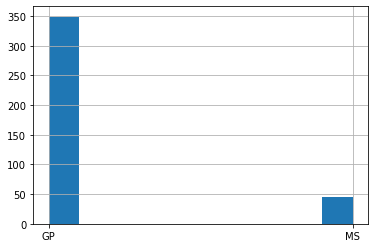

In [158]:
full_info(stud_math.school, 'school')

Как видим, имеется два уникальных значений и без пустых ячеек.

## sex — пол ученика ('F' - женский, 'M' - мужской)

'Пример данных:'

0      F
1      F
2      F
3      F
4      F
      ..
390    M
391    M
392    M
393    M
394    M
Name: sex, Length: 395, dtype: object

'Описание:'

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

'Сколько значений содержит столбец:'

,sex
F,208
M,187


'Кол-во уникальных значений:'

2

'Уникальные значения:'

array(['F', 'M'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

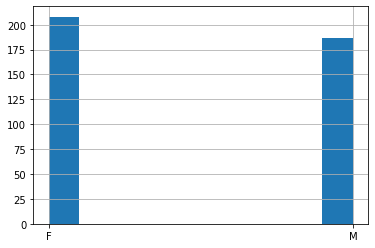

In [159]:
full_info(stud_math.sex, 'sex')

Делаем вывод, что с данными с этим параметром чего-то необычного нет (пустых или необычных значений нет).
Отметим, что количество учеников женского пола больше.

## age — возраст ученика (от 15 до 22)

'Пример данных:'

0      18
1      17
2      15
3      15
4      16
       ..
390    20
391    17
392    21
393    18
394    19
Name: age, Length: 395, dtype: int64

'Описание:'

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

'Сколько значений содержит столбец:'

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


'Кол-во уникальных значений:'

8

'Уникальные значения:'

array([18, 17, 15, 16, 19, 22, 20, 21])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

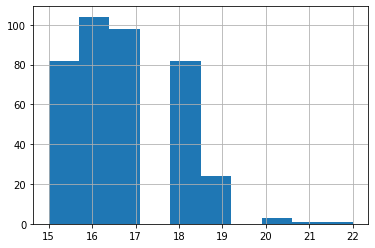

In [160]:
full_info(stud_math.age, 'age')

Делаем вывод, что с данными с этим параметром чего-то необычного нет (пустых или необычных значений нет, как и выбросов). Отметим, что с увеличением возраста количество учащихся уменьшается.

## address — тип адреса ученика ('U' - городской, 'R' - за городом)

'Пример данных:'

0      U
1      U
2      U
3      U
4      U
      ..
390    U
391    U
392    R
393    R
394    U
Name: address, Length: 395, dtype: object

'Описание:'

count     378
unique      2
top         U
freq      295
Name: address, dtype: object

'Сколько значений содержит столбец:'

,address
U,295
R,83


'Кол-во уникальных значений:'

2

'Уникальные значения:'

array(['U', nan, 'R'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

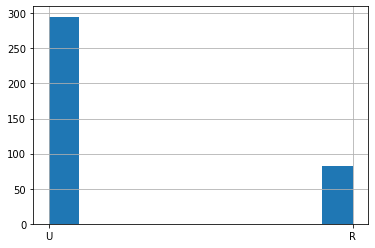

In [161]:
full_info(stud_math.address, 'address')

Видим наличие nan. Заменим их на None.
Для удобства, и возможного использования для следующи параметров, напишем функцию.

In [162]:
stud_math.address = stud_math.address.apply(nan_to_none)

Вывод: в стобце есть 17 наблюдений, по которых нет информации об адресе. Городских учеников существенно больше, чем учеников, живущих за городом.

## famsize — размер семьи('LE3' <= 3, 'GT3' >3)

'Пример данных:'

0      NaN
1      GT3
2      LE3
3      GT3
4      GT3
      ... 
390    LE3
391    LE3
392    GT3
393    LE3
394    LE3
Name: famsize, Length: 395, dtype: object

'Описание:'

count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

'Сколько значений содержит столбец:'

,famsize
GT3,261
LE3,107


'Кол-во уникальных значений:'

2

'Уникальные значения:'

array([nan, 'GT3', 'LE3'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

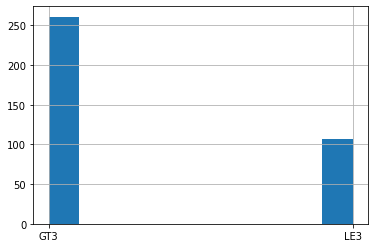

In [163]:
full_info(stud_math.famsize, 'famsize')

Применим замену nan на None

In [164]:
stud_math.famsize = stud_math.famsize.apply(nan_to_none)

Вывод: 27 значений без данных. Учеников, которые живут с семьей больше 3-х человек больше.

## Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

'Пример данных:'

0        A
1      NaN
2        T
3        T
4        T
      ... 
390      A
391      T
392      T
393      T
394      T
Name: Pstatus, Length: 395, dtype: object

'Описание:'

count     350
unique      2
top         T
freq      314
Name: Pstatus, dtype: object

'Сколько значений содержит столбец:'

,Pstatus
T,314
A,36


'Кол-во уникальных значений:'

2

'Уникальные значения:'

array(['A', nan, 'T'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

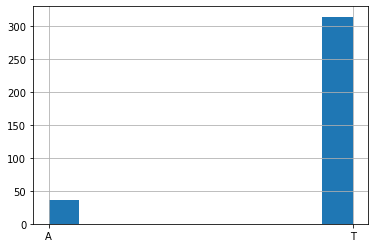

In [165]:
full_info(stud_math.Pstatus, 'Pstatus')

In [166]:
stud_math.Pstatus = stud_math.Pstatus.apply(nan_to_none)

Вывод: семей, где родители живут вместе большинство. 45 строк не имеет данных.

## Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

'Пример данных:'

0      4.0
1      1.0
2      1.0
3      4.0
4      3.0
      ... 
390    2.0
391    3.0
392    1.0
393    3.0
394    1.0
Name: Medu, Length: 395, dtype: float64

'Описание:'

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

'Сколько значений содержит столбец:'

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


'Кол-во уникальных значений:'

5

'Уникальные значения:'

array([ 4.,  1.,  3.,  2., nan,  0.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

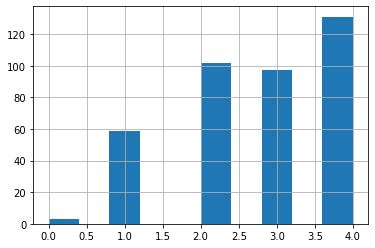

In [167]:
full_info(stud_math.Medu, 'Medu')

Выбросов нет, большинство матерей получило высшее образование. По 3 значениям нет данных.

## Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

'Пример данных:'

0      4.0
1      1.0
2      1.0
3      2.0
4      3.0
      ... 
390    2.0
391    1.0
392    1.0
393    2.0
394    1.0
Name: Fedu, Length: 395, dtype: float64

'Описание:'

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

'Сколько значений содержит столбец:'

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


'Кол-во уникальных значений:'

6

'Уникальные значения:'

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

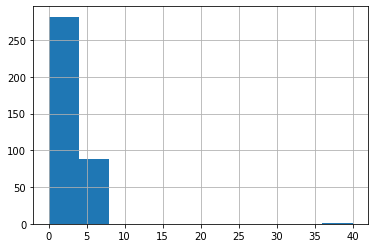

In [168]:
full_info(stud_math.Fedu, 'Fedu')

Видим значение параметра = 40, хотя данного варианта быть не может. Можем сделать вывод, что в данном наблюдении имеется ошибка. Тут есть 2 варианта: либо это выброс, либо случайно вместо максимального балла "4" дописали "0". Примем второй вариант за истину и заменим значение 40 на 4.

In [169]:
stud_math.Fedu[stud_math.Fedu > 4.0] = 4.0


<ipython-input-169-608addf32a20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math.Fedu[stud_math.Fedu > 4.0] = 4.0


'Пример данных:'

0      4.0
1      1.0
2      1.0
3      2.0
4      3.0
      ... 
390    2.0
391    1.0
392    1.0
393    2.0
394    1.0
Name: Fedu, Length: 395, dtype: float64

'Описание:'

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

'Сколько значений содержит столбец:'

,Fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


'Кол-во уникальных значений:'

5

'Уникальные значения:'

array([ 4.,  1.,  2.,  3., nan,  0.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

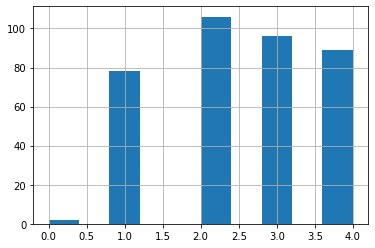

In [170]:
full_info(stud_math.Fedu, 'Fedu')

Вывод: заменили значение выброса на более возможный вариант. По 24 строкам нет данных.

## Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

'Пример данных:'

0       at_home
1       at_home
2       at_home
3        health
4         other
         ...   
390    services
391    services
392       other
393    services
394       other
Name: Mjob, Length: 395, dtype: object

'Описание:'

count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object

'Сколько значений содержит столбец:'

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


'Кол-во уникальных значений:'

5

'Уникальные значения:'

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

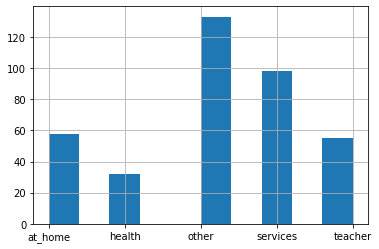

In [171]:
full_info(stud_math.Mjob, 'Mjob')

In [172]:
stud_math.Mjob = stud_math.Mjob.apply(nan_to_none)

Вывод: информация не совсем информативна, т.к. большинство профессий матерей не выделена отдельно.

## Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

'Пример данных:'

0       teacher
1         other
2         other
3           NaN
4         other
         ...   
390    services
391    services
392       other
393       other
394     at_home
Name: Fjob, Length: 395, dtype: object

'Описание:'

count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object

'Сколько значений содержит столбец:'

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


'Кол-во уникальных значений:'

5

'Уникальные значения:'

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

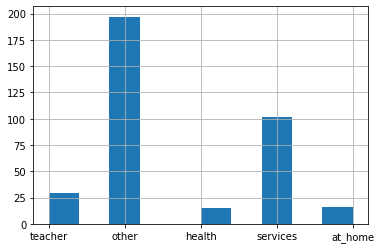

In [173]:
full_info(stud_math.Fjob, 'Fjob')

In [174]:
stud_math.Fjob = stud_math.Fjob.apply(nan_to_none)

Вывод: аналогичная ситуация что и с профессиями матери - большинство профессий отцов неопределено явно.

##  reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

'Пример данных:'

0      course
1      course
2       other
3        home
4        home
        ...  
390    course
391    course
392    course
393    course
394       NaN
Name: reason, Length: 395, dtype: object

'Описание:'

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

'Сколько значений содержит столбец:'

,reason
course,137
home,104
reputation,103
other,34


'Кол-во уникальных значений:'

4

'Уникальные значения:'

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

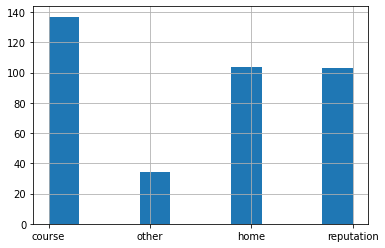

In [175]:
full_info(stud_math.reason, 'reason')

In [176]:
stud_math.reason = stud_math.reason.apply(nan_to_none)

Вывод: причины выбора школы примерно равны, с небольшим перекосом в образовательную программу.

## guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

'Пример данных:'

0      mother
1      father
2      mother
3      mother
4      father
        ...  
390       NaN
391    mother
392       NaN
393    mother
394    father
Name: guardian, Length: 395, dtype: object

'Описание:'

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

'Сколько значений содержит столбец:'

,guardian
mother,250
father,86
other,28


'Кол-во уникальных значений:'

3

'Уникальные значения:'

array(['mother', 'father', 'other', nan], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

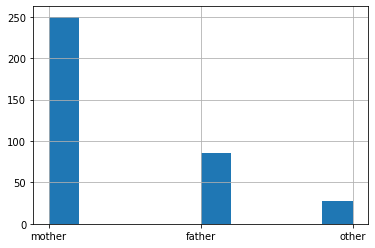

In [177]:
full_info(stud_math.guardian, 'guardian')

In [178]:
stud_math.guardian = stud_math.guardian.apply(nan_to_none)

Вывод: в большинстве наблюдений опекуном является мать.

## traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

'Пример данных:'

0      2.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
390    1.0
391    2.0
392    1.0
393    3.0
394    1.0
Name: traveltime, Length: 395, dtype: float64

'Описание:'

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

'Сколько значений содержит столбец:'

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


'Кол-во уникальных значений:'

4

'Уникальные значения:'

array([ 2.,  1.,  3., nan,  4.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

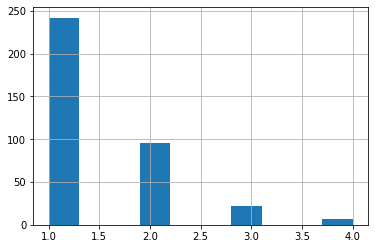

In [179]:
full_info(stud_math.traveltime, 'traveltime')

Вывод: в подавляющем большинстве наблюдений время пути в школу < 15 минут.

## studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

'Пример данных:'

0      2.0
1      2.0
2      2.0
3      3.0
4      2.0
      ... 
390    2.0
391    1.0
392    1.0
393    1.0
394    1.0
Name: studytime, Length: 395, dtype: float64

'Описание:'

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

'Сколько значений содержит столбец:'

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


'Кол-во уникальных значений:'

4

'Уникальные значения:'

array([ 2.,  3.,  1., nan,  4.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

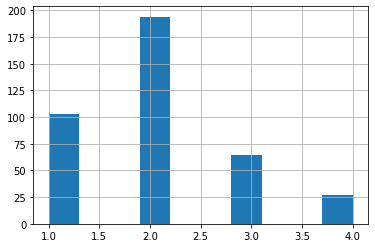

In [180]:
full_info(stud_math.studytime, 'studytime')

Заменим числовые значения на более понятные обозначения:

Вывод: существенно большее число наблюдений свидетельствует о времени учебы помимо школы в течение 2-5 часов.

## failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

'Пример данных:'

0      0.0
1      0.0
2      3.0
3      0.0
4      0.0
      ... 
390    2.0
391    0.0
392    3.0
393    0.0
394    0.0
Name: failures, Length: 395, dtype: float64

'Описание:'

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

'Сколько значений содержит столбец:'

,failures
0.0,293
1.0,49
2.0,16
3.0,15


'Кол-во уникальных значений:'

4

'Уникальные значения:'

array([ 0.,  3., nan,  2.,  1.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

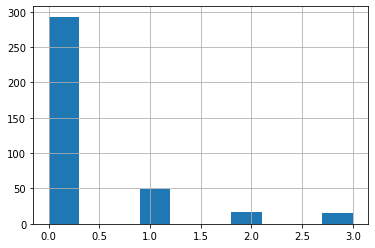

In [181]:
full_info(stud_math.failures, 'failures')

Вывод: у большинства учеников нет внеучебных неудач.

## schoolsup — дополнительная образовательная поддержка (yes или no)

'Пример данных:'

0      yes
1       no
2      yes
3       no
4       no
      ... 
390     no
391     no
392    NaN
393     no
394    NaN
Name: schoolsup, Length: 395, dtype: object

'Описание:'

count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

'Сколько значений содержит столбец:'

,schoolsup
no,335
yes,51


'Кол-во уникальных значений:'

2

'Уникальные значения:'

array(['yes', 'no', nan], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

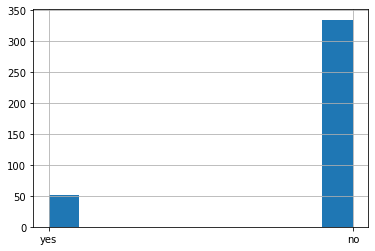

In [182]:
full_info(stud_math.schoolsup, 'schoolsup')

In [183]:
stud_math.schoolsup = stud_math.schoolsup.astype(str).apply(nan_to_none)

## famsup — семейная образовательная поддержка (yes или no)

'Пример данных:'

0       no
1      yes
2       no
3      yes
4      yes
      ... 
390    yes
391     no
392     no
393     no
394     no
Name: famsup, Length: 395, dtype: object

'Описание:'

count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

'Сколько значений содержит столбец:'

,famsup
yes,219
no,137


'Кол-во уникальных значений:'

2

'Уникальные значения:'

array(['no', 'yes', nan], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

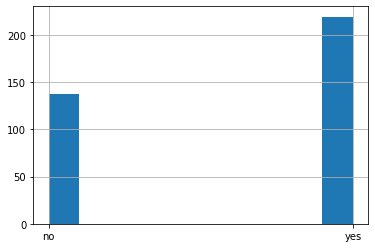

In [184]:
full_info(stud_math.famsup, 'famsup')

In [185]:
stud_math.famsup = stud_math.famsup.apply(nan_to_none)

Вывод: отметим большое количество пустых значений.

## paid — дополнительные платные занятия по математике (yes или no)

'Пример данных:'

0       no
1       no
2      NaN
3      yes
4      yes
      ... 
390    yes
391     no
392     no
393     no
394     no
Name: paid, Length: 395, dtype: object

'Описание:'

count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

'Сколько значений содержит столбец:'

,paid
no,200
yes,155


'Кол-во уникальных значений:'

2

'Уникальные значения:'

array(['no', nan, 'yes'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

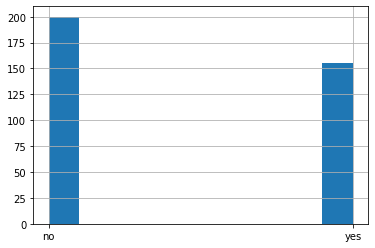

In [186]:
full_info(stud_math.paid, 'paid')
stud_math.paid = stud_math.paid.apply(nan_to_none)

## activities — дополнительные внеучебные занятия (yes или no)

'Пример данных:'

0        no
1        no
2        no
3       yes
4        no
       ... 
390      no
391      no
392      no
393    None
394      no
Name: activities, Length: 395, dtype: object

'Описание:'

count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

'Сколько значений содержит столбец:'

,activities
yes,195
no,186


'Кол-во уникальных значений:'

2

'Уникальные значения:'

array(['no', 'yes', None], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

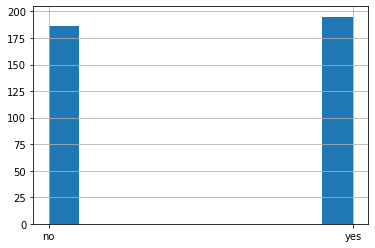

In [187]:
stud_math.activities = stud_math.activities.apply(nan_to_none)
full_info(stud_math.activities, 'activities')

## nursery — посещал детский сад (yes или no)

'Пример данных:'

0      yes
1       no
2      yes
3      yes
4      yes
      ... 
390    yes
391     no
392     no
393     no
394    yes
Name: nursery, Length: 395, dtype: object

'Описание:'

count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

'Сколько значений содержит столбец:'

,nursery
yes,300
no,79


'Кол-во уникальных значений:'

2

'Уникальные значения:'

array(['yes', 'no', None], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

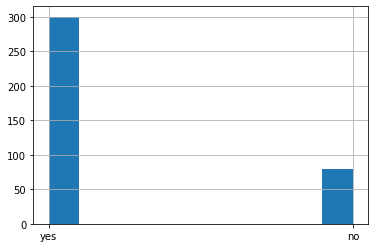

In [188]:
stud_math.nursery = stud_math.nursery.astype(str).apply(nan_to_none)
full_info(stud_math.nursery, 'nursery')

## higher — хочет получить высшее образование (yes или no)

'Пример данных:'

0       yes
1       yes
2       yes
3       yes
4       yes
       ... 
390     yes
391     yes
392    None
393     yes
394     yes
Name: higher, Length: 395, dtype: object

'Описание:'

count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

'Сколько значений содержит столбец:'

,higher
yes,356
no,19


'Кол-во уникальных значений:'

2

'Уникальные значения:'

array(['yes', None, 'no'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

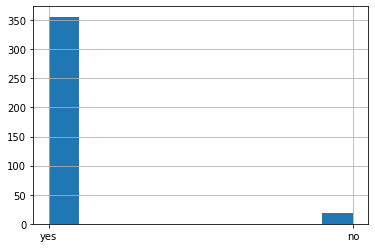

In [189]:
stud_math.higher = stud_math.higher.astype(str).apply(nan_to_none)
full_info(stud_math.higher, 'higher')

## internet — наличие интернета дома (yes или no)

'Пример данных:'

0      None
1       yes
2       yes
3       yes
4        no
       ... 
390      no
391     yes
392      no
393     yes
394     yes
Name: internet, Length: 395, dtype: object

'Описание:'

count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

'Сколько значений содержит столбец:'

,internet
yes,305
no,56


'Кол-во уникальных значений:'

2

'Уникальные значения:'

array([None, 'yes', 'no'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

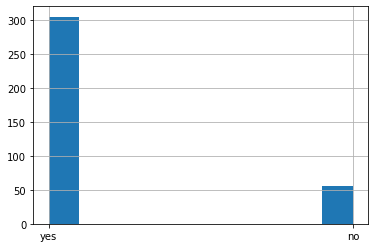

In [190]:
stud_math.internet = stud_math.internet.apply(nan_to_none)
full_info(stud_math.internet, 'internet')

Вывод: большинство учащихся посещало детский сад.

## romantic — в романтических отношениях (yes или no)

'Пример данных:'

0        no
1        no
2      None
3       yes
4        no
       ... 
390      no
391      no
392      no
393      no
394      no
Name: romantic, Length: 395, dtype: object

'Описание:'

count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object

'Сколько значений содержит столбец:'

,romantic
no,240
yes,124


'Кол-во уникальных значений:'

2

'Уникальные значения:'

array(['no', None, 'yes'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


'Инфо:'

None

'Гистограмма:'

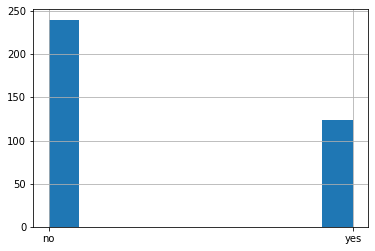

In [191]:
stud_math.romantic = stud_math.romantic.apply(nan_to_none)
full_info(stud_math.romantic, 'romantic')

## famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

'Пример данных:'

0      4.0
1      5.0
2      4.0
3      3.0
4      4.0
      ... 
390    5.0
391    2.0
392    5.0
393    4.0
394    3.0
Name: famrel, Length: 395, dtype: float64

'Описание:'

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

'Сколько значений содержит столбец:'

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


'Кол-во уникальных значений:'

6

'Уникальные значения:'

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

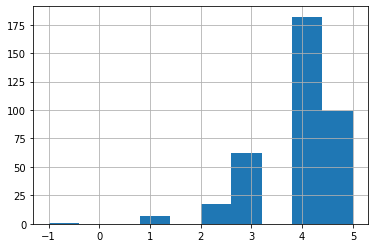

In [192]:
full_info(stud_math.famrel, 'famrel')

Видим необычное значение -1. Опять же, есть варианты: либо же сделана ошибка, либо же в одном наблюдении отношения в семье настолько плохи, что установлено такое отрицательное значение. В любом случае, заменим данное значение на 1. 

In [193]:
stud_math.famrel[stud_math.famrel < 1] = 1.0

<ipython-input-193-5f0a5e1616db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math.famrel[stud_math.famrel < 1] = 1.0


'Пример данных:'

0      4.0
1      5.0
2      4.0
3      3.0
4      4.0
      ... 
390    5.0
391    2.0
392    5.0
393    4.0
394    3.0
Name: famrel, Length: 395, dtype: float64

'Описание:'

count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

'Сколько значений содержит столбец:'

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


'Кол-во уникальных значений:'

5

'Уникальные значения:'

array([ 4.,  5.,  3., nan,  1.,  2.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

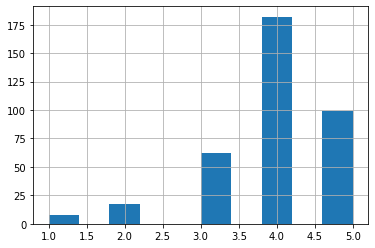

In [194]:
full_info(stud_math.famrel, 'famrel')

Выводы: в целом, в большинстве семей отношения удовлетворительные и выше.

## freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

'Пример данных:'

0      3.0
1      3.0
2      3.0
3      2.0
4      3.0
      ... 
390    5.0
391    4.0
392    5.0
393    4.0
394    2.0
Name: freetime, Length: 395, dtype: float64

'Описание:'

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

'Сколько значений содержит столбец:'

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


'Кол-во уникальных значений:'

5

'Уникальные значения:'

array([ 3.,  2.,  4.,  1.,  5., nan])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

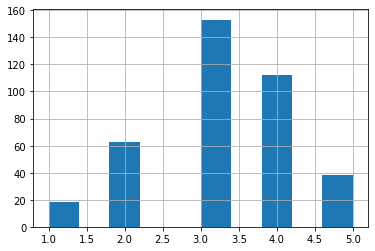

In [195]:
full_info(stud_math.freetime, 'freetime')

In [196]:
stud_math.freetime = stud_math.freetime.apply(nan_to_none)

Выводы: оценки свободного времени удовлетворительные.

## goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

'Пример данных:'

0      4.0
1      3.0
2      2.0
3      2.0
4      2.0
      ... 
390    4.0
391    5.0
392    3.0
393    1.0
394    3.0
Name: goout, Length: 395, dtype: float64

'Описание:'

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

'Сколько значений содержит столбец:'

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


'Кол-во уникальных значений:'

5

'Уникальные значения:'

array([ 4.,  3.,  2.,  1.,  5., nan])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

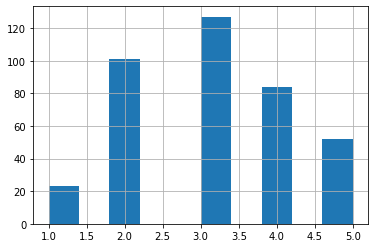

In [197]:
full_info(stud_math.goout, 'goout')

Вывод: в основном времени проводится удовлетворительно.

## health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

'Пример данных:'

0      3.0
1      3.0
2      3.0
3      5.0
4      5.0
      ... 
390    4.0
391    2.0
392    3.0
393    5.0
394    5.0
Name: health, Length: 395, dtype: float64

'Описание:'

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

'Сколько значений содержит столбец:'

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


'Кол-во уникальных значений:'

5

'Уникальные значения:'

array([ 3.,  5.,  1.,  2.,  4., nan])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

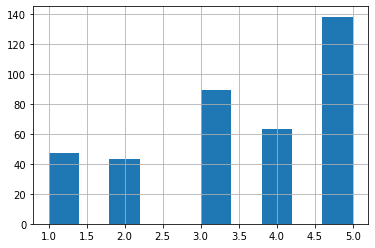

In [198]:
full_info(stud_math.health, 'health')

Выводы: Большинство учащихся с хорошим здоровьем.

## absences — количество пропущенных занятий

'Пример данных:'

0        6.0
1        4.0
2       10.0
3        2.0
4        4.0
       ...  
390    212.0
391      3.0
392      3.0
393      0.0
394      5.0
Name: absences, Length: 395, dtype: float64

'Описание:'

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

'Сколько значений содержит столбец:'

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


'Кол-во уникальных значений:'

36

'Уникальные значения:'

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

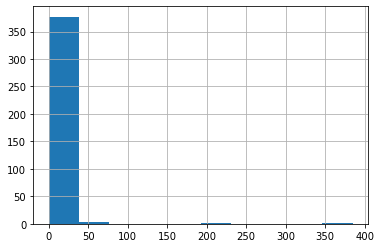

In [199]:
full_info(stud_math.absences, 'absences')

Видим наличие практически нереальных значений. Попробуем избавиться от них путем поиска границ выбросов.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


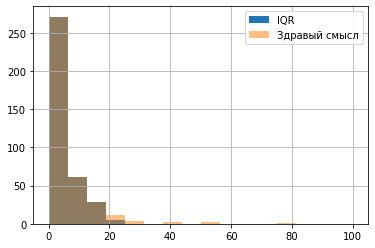

In [200]:
median = stud_math.absences.median()
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.absences.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (0, 100), 
                                                                                             label = 'IQR')
stud_math.absences.loc[stud_math.absences <= 100].hist(alpha = 0.5, bins = 16, range = (0, 100),
                                                        label = 'Здравый смысл')
plt.legend();

Верхня граница выброса = 20. Однако попробуем чуть увеличить значение и использовать значение 70 для всех значений, которые > 70.

In [201]:
stud_math.absences[stud_math.absences > 70.0] = 70.0

<ipython-input-201-80444e00b128>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math.absences[stud_math.absences > 70.0] = 70.0


'Пример данных:'

0       6.0
1       4.0
2      10.0
3       2.0
4       4.0
       ... 
390    70.0
391     3.0
392     3.0
393     0.0
394     5.0
Name: absences, Length: 395, dtype: float64

'Описание:'

count    383.000000
mean       6.073107
std        9.211016
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       70.000000
Name: absences, dtype: float64

'Сколько значений содержит столбец:'

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


'Кол-во уникальных значений:'

34

'Уникальные значения:'

array([ 6.,  4., 10.,  2.,  0., 16., nan, 14.,  7.,  8., 25., 12., 54.,
       18., 26., 20., 56., 24., 28.,  5., 13., 15., 22.,  3., 70., 21.,
        1., 30., 19.,  9., 11., 38., 40., 23., 17.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

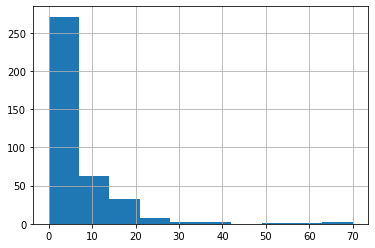

In [202]:
full_info(stud_math.absences, 'absences')

Выводы: отметим, что большинство учащихся не пропускало занятия.

## score — баллы по госэкзамену по математике

'Пример данных:'

0      30.0
1      30.0
2      50.0
3      75.0
4      50.0
       ... 
390    45.0
391    80.0
392    35.0
393    50.0
394    45.0
Name: score, Length: 395, dtype: float64

'Описание:'

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

'Сколько значений содержит столбец:'

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


'Кол-во уникальных значений:'

18

'Уникальные значения:'

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


'Инфо:'

None

'Гистограмма:'

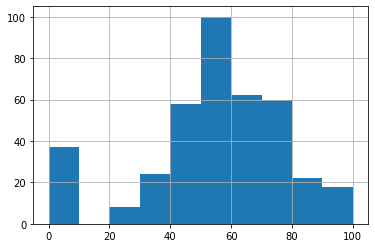

In [203]:
full_info(stud_math.score, 'score')

Как видим, значений много и они разбросаны практически на протяжении всего промежутка от 0 до 100. Учитывая, что значений 0 довольно много, можем сделать вывод о том, что либо учащийся вообще ничего не сделал верно, либо что вообще не явился.

## Корреляционный анализ

Составим графики для числовых параметров, по которым адекватно можно просчитать среднее. Значения "studytime" и "studytime, granular" взяты в порядке исключения, так как названия у них подозрительны и значения тоже.:

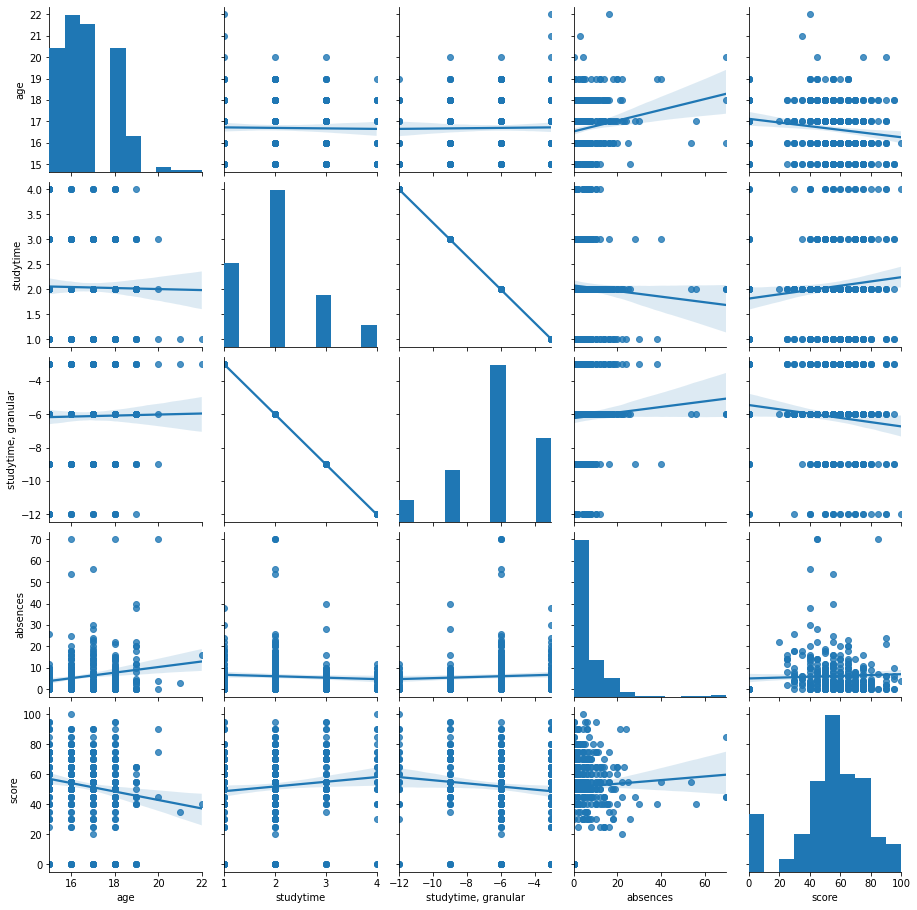

In [204]:
sns.pairplot(stud_math,
             kind='reg',
             x_vars=["age", "studytime",
                     "studytime, granular", 'absences', 'score'],
             y_vars=["age", "studytime", 'studytime, granular', 'absences', 'score'],)

Построим матрицу корреляции:

In [205]:
df = pd.DataFrame(stud_math, columns=[
                  "age", "studytime", "studytime, granular", 'absences', 'score'])
df.corr()

,age,studytime,"studytime, granular",absences,score
age,1.000000,-0.015556,0.015556,0.180713,-0.155726
studytime,-0.015556,1.000000,-1.000000,-0.061071,0.115741
"studytime, granular",0.015556,-1.000000,1.000000,0.061071,-0.115741
absences,0.180713,-0.061071,0.061071,1.000000,0.049028
score,-0.155726,0.115741,-0.115741,0.049028,1.000000


### Выводы корреляционного анализа

Оставляем столбцы "age", "studytime", 'absences'


Удаляем признак "studytime, granular" в связи с полной корреляцией между ними.

In [206]:
stud_math.drop(['studytime, granular'], inplace = True, axis = 1)

## Анализ номинативных переменных

In [207]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

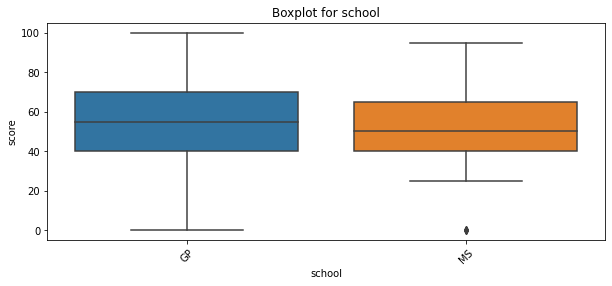

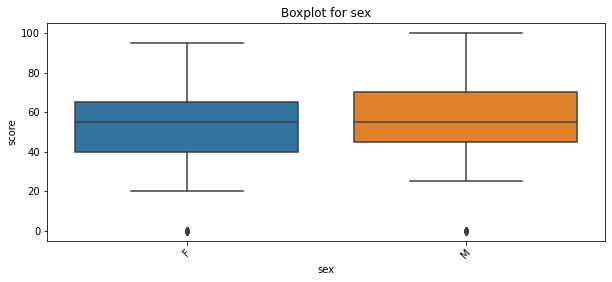

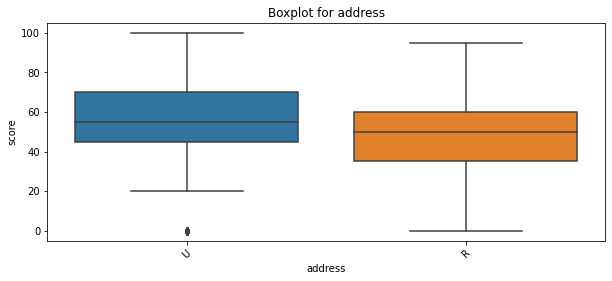

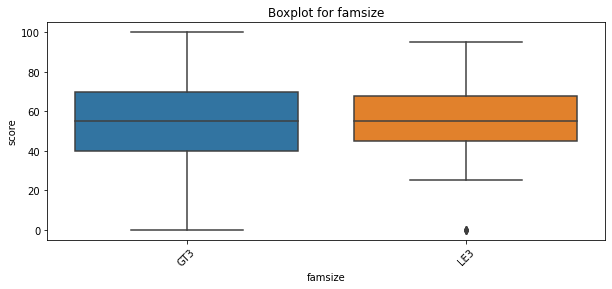

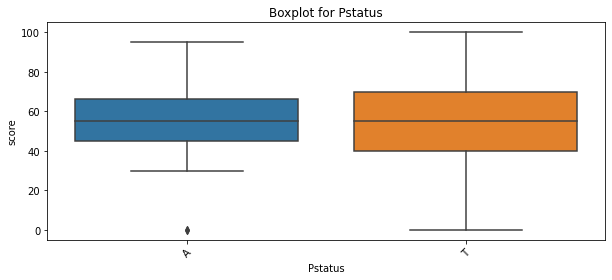

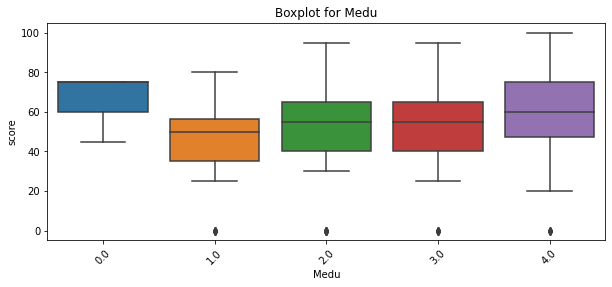

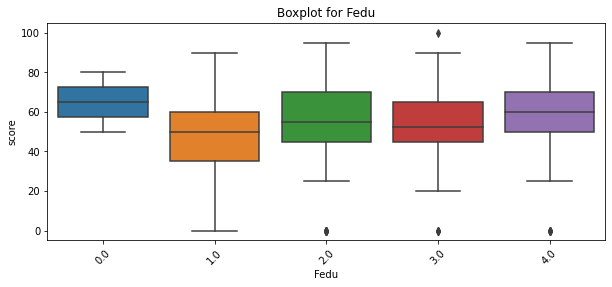

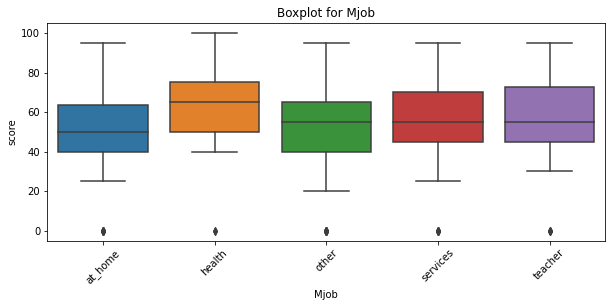

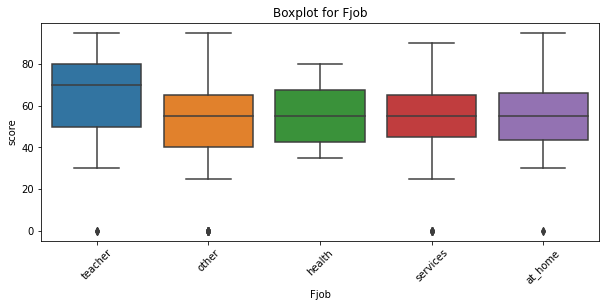

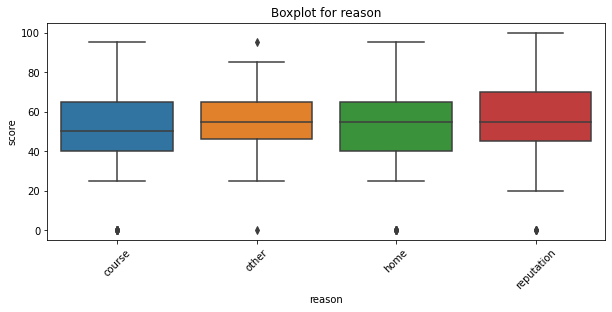

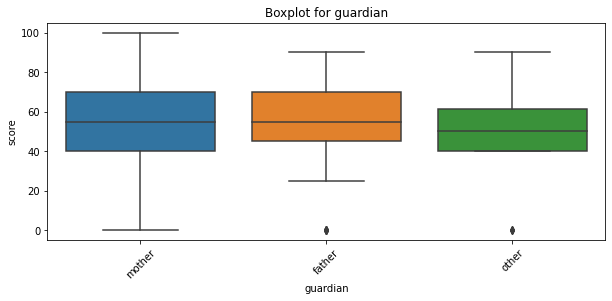

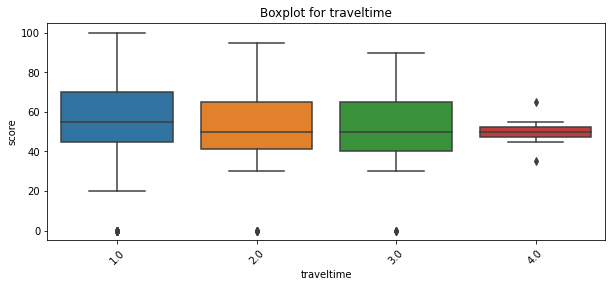

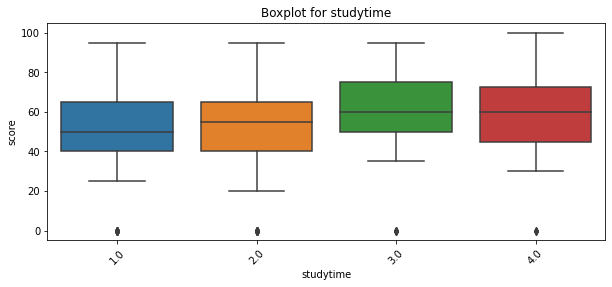

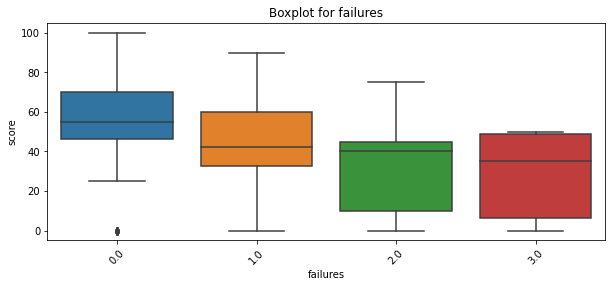

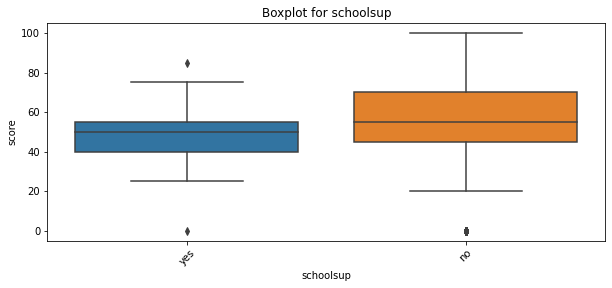

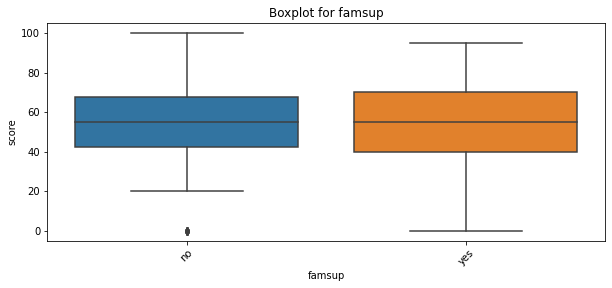

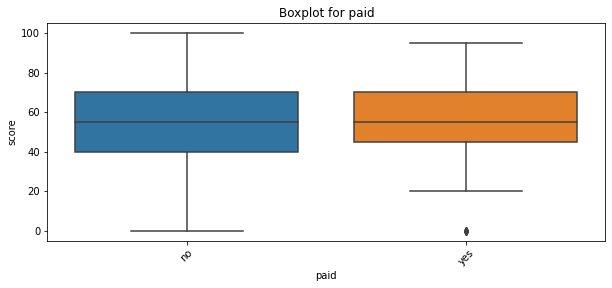

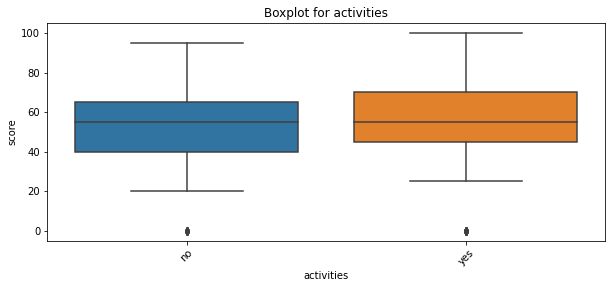

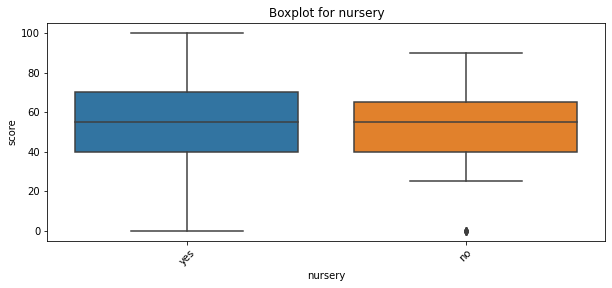

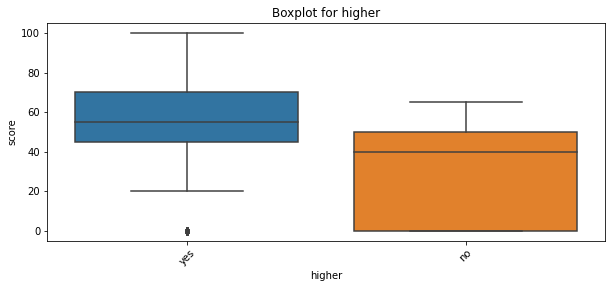

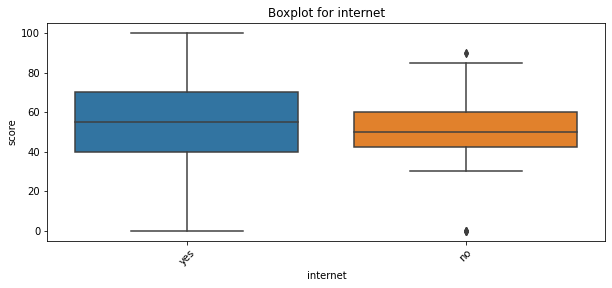

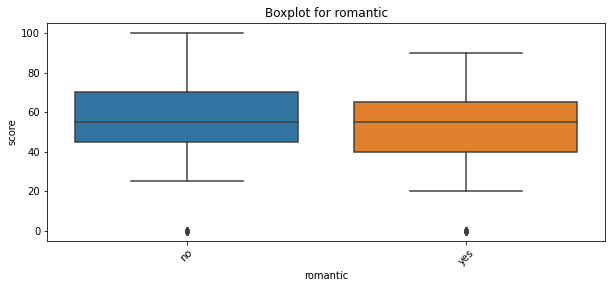

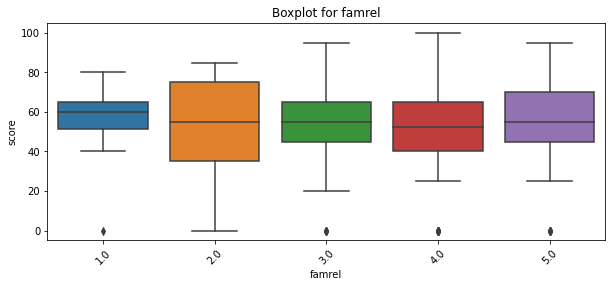

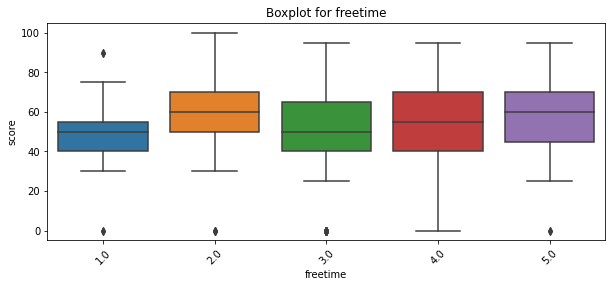

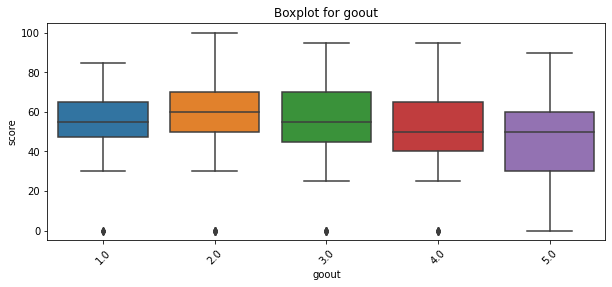

In [208]:
for col in ['school',
            'sex',
            'address',
            'famsize',
            'Pstatus',
            'Medu',
            'Fedu',
            'Mjob',
            'Fjob',
            'reason',
            'guardian',
            'traveltime',
            'studytime',
            'failures',
            'schoolsup',
            'famsup',
            'paid',
            'activities',
            'nursery',
            'higher',
            'internet',
            'romantic',
            'famrel',
            'freetime',
            'goout',
            ]:
    get_boxplot(col)

### Выводы анализа номинативных переменных

1. Аббревиатура школы не оказывает существенного влияния на оценку учащегося.
2. У представителей мужского пола немного выше оценки.
3. Учащиейся, проживающие в городе имеют оценки выше, чем учащиеся живущие за городом.
4. Размер семьи оказывает незначительное влияние на оценку. Учащиеся из семей, где семья насчитывает более 3 человек показывают чуть лучше результаты.
5. Статус совместного проживания родителей не оказывает существенного влияния на оценку учащегося.
6. Качество полученного бразования матерью влияет на оценку.
7. Качество полученного бразования отцом влияет на оценку.
8. Работа матери и отца не оказывают существенного влияния на оценку.
9. Причина выбора школы, опекун, время на дорогу, время на учебу вне школы, поддержка в школе, поддержка семьи, дополнительные платные занятия по математике, дополнительные внеучебные занятия, посещение детсада, наличие интернета, наличие романтических отношений  не влияют существенно.
10. Желание получения высшего образования существенно влияет на оценку. Учащиеся, которые желали получить высшее образование получили по итогу оценки существенно выше.

Однако, это все графики, но более точно посчитает тест Стьюдента:

In [209]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [210]:
for col in ['school',
            'sex',
            'address',
            'famsize',
            'Pstatus',
            'Medu',
            'Fedu',
            'Mjob',
            'Fjob',
            'reason',
            'guardian',
            'traveltime',
            'studytime',
            'failures',
            'schoolsup',
            'famsup',
            'paid',
            'activities',
            'nursery',
            'higher',
            'internet',
            'romantic',
            'famrel',
            'freetime',
            'goout']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


### Общие выводы

1. В самом датасете большое количество пустых значений. Данный фактор существенно влияет на качество данных.
2. Выбросы найдены, но они немногочисленны и заменены либо исключены.
3. Корреляции между оценкой и параметром количества неудач, когда при увеличении количества неудач ухудшаются оценки говорит о том, что чем больше неудач в жизни - тем хуже результат.
4. Так же, можно отметить небольшое ухудшение успеваемости с возрастом.
5. Еще одним наблюдением стало влияние качества образования матери на результат теста, что может свидетельствовать о том, что учащийся с более образованной матерью получает лучше оценки.

Из всего перечисленного, выделю несколько признаков, которые оказывают существенное влияние на оценку:
failures — количество внеучебных неудач
higher — хочет получить высшее образование

Параметры, которые необходимо оставить:
1. address
2. Medu
3. Mjob
4. failures
5. higher
6. romantic
7. goout
8. age
9. studytime
10. absences


In [211]:
stud_math_for_model = stud_math.loc[:, ['address', 'Medu', 'Mjob', 'failures', 'higher', 'romantic', 'goout', 'age', 'studytime', 'absences']]
stud_math_for_model.head()

,address,Medu,Mjob,failures,higher,romantic,goout,age,studytime,absences
0,U,4.0,at_home,0.0,yes,no,4.0,18,2.0,6.0
1,U,1.0,at_home,0.0,yes,no,3.0,17,2.0,4.0
2,U,1.0,at_home,3.0,yes,None,2.0,15,2.0,10.0
3,U,4.0,health,0.0,yes,yes,2.0,15,3.0,2.0
4,U,3.0,other,0.0,yes,no,2.0,16,2.0,4.0
